<i> Nos données datent de 1980, cependant l'accès aux données a évolué avec le temps et il se peut que certaines données soient manquantes. Néanmoins, les données sur les catastrophes naturelles restent cependant assez fiables

# Import des librairies utilisées lors de l'analyse et traitement des données

In [124]:
# Importing libraries neeeded for the project
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Nettoyage des données du CSV : "Climate Disasters Frequency.csv"

In [169]:
# Lit le fichier csv et le stocke dans df_disasters
df_disasters = pd.read_csv("Climate Disasters Frequency.csv", delimiter=",")

# Supprime les colonnes inutiles
df_disasters = df_disasters.drop(columns=["ObjectId", "Country", "ISO2", "Unit", "Source", "CTS_Code", "CTS_Name", "CTS_Full_Descriptor"])

# Renomme les colonnes des années qui commencent par "F" en enlevant le "F" préfixe
df_disasters = df_disasters.rename(columns=lambda x: x[1:] if x.startswith("F") else x)

# Renomme les valeurs de Indicator en gardant uniquement le nom de la catastrophe
str_to_remove = "Climate related disasters frequency, Number of Disasters: "
df_disasters["Indicator"] = df_disasters["Indicator"].str.replace(str_to_remove, "")

# Supprime les lignes où indicator est égal à "TOTAL"
df_disasters = df_disasters[df_disasters["Indicator"] != "TOTAL"]

# Melt le dataframe pour avoir les années dans une colonne
df_disasters = df_disasters.melt(id_vars=["Indicator", "ISO3"], var_name="Year", value_name="Occurrences")


# Affiche le haut du dataframe
df_disasters.head()

,Indicator,ISO3,Year,Occurrences
0,Drought,AFG,1980,NaN
1,Extreme temperature,AFG,1980,NaN
2,Flood,AFG,1980,1.0
3,Landslide,AFG,1980,NaN
4,Storm,AFG,1980,NaN


# Nettoyage des données du CSV : "Atmospheric CO2 Concentrations.csv"

Notre jeu de données inital est un fichier csv ayant les valeurs observées des concentrations de CO2 dans le monde pour chaque mois depuis Mars 1958.Nous avons fait le choix d'avoir un DataFrame avec seulement deux colonnes, les années et les valeurs exprimées en unité. Pour cela, nous avons premièrement supprimé toutes les observations dont la valeur était exprimée en pourcentage. Nous avons ensuite formatté la colonne Date pour avoir un vrai format de date en Pandas. Ainsi, nous avons pu facilement récupérer les années de chaque observation afin de pouvoir supprimer toutes les observations antérieures à 1980 car nos observations sur les catastrophes naturelles commencent à cette date là aussi. Enfin, nous avons regroupé les observations par année en aggrégant nos valeurs par une moyenne. Nous aurions aussi pu choisir un mois de l'année et ne garder que cette valeur là mais il nous semble que ce choix là n'influe en rien sur les tendances réelles de la concentration en CO2 dans le monde au fil des ans.

In [126]:
# Lit le fichier csv et le stocke dans df_emissions
df_emission = pd.read_csv('Atmospheric CO2 Concentrations.csv', delimiter=',')

# Supprime les lignes où l'unité est en pourcent
df_emission = df_emission[df_emission['Unit'] != 'Percent']

# Convertit les dates en datetime
df_emission['Date'] = pd.to_datetime(df_emission['Date'], format='%YM%m')

# Extrait l'année de la date et le rajoute dans une colonne "Year"
df_emission['Year'] = df_emission['Date'].dt.year

# Supprime les valeurs pour les années antérieures à 1980
df_emission = df_emission[df_emission['Year'] >= 1980]

# Groupe les données par année
df_emission = df_emission.groupby('Year')['Value'].mean().reset_index()
df_emission.head()

,Year,Value
0,1980,338.762500
1,1981,340.119167
2,1982,341.479167
3,1983,343.152500
4,1984,344.868333


# Récupération des pays

In [192]:
countries = pd.read_csv('Country Mapping.csv', delimiter=';')
countries = countries.rename(columns={'alpha-3': 'ISO3', 'name': 'Country'}).drop(columns=['alpha-2'])
countries.head()

,Country,ISO3,region,sub-region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


# Dataframe de la somme des catastrophe par année

In [203]:
# Transformation des données pour obtenir le total annuel des catastrophes à l'échelle mondiale

# Calculer la somme des catastrophes par année
global_disasters_per_year = df_disasters.groupby('Year')['Occurrences'].sum()

# Conversion en DataFrame pour faciliter les visualisations
df_global_disasters = global_disasters_per_year.reset_index()
df_global_disasters['Year'] = df_global_disasters['Year'].astype(int)
df_global_disasters


df_global_disasters.head()


,Year,Occurrences
0,1980,104.0
1,1981,112.0
2,1982,120.0
3,1983,157.0
4,1984,117.0


## Création d'un dataframe groupant par catastrophe et par année

In [128]:
# Dataframe avec les occurences de catastrophes par année dans le monde
df_disasters_world = df_disasters.groupby(["Indicator", "Year"]).sum("Occurrences").reset_index()
df_disasters_world.head()

,Indicator,Year,Occurrences
0,Drought,1980,24.0
1,Drought,1981,18.0
2,Drought,1982,6.0
3,Drought,1983,26.0
4,Drought,1984,6.0


# Partie de AYA

## Graphique 1

In [197]:
# DataFrame df_Wildfire_melt
df_Flood = df_disasters[df_disasters['Indicator'] == 'Flood']

print(df_Flood)

# Trouver les valeurs minimales et maximales de la colonne 'Flood' pour fixer l'échelle de couleur
min_echelle = df_Flood['Occurrences'].min()
max_echelle = df_Flood['Occurrences'].max()

fig = px.choropleth(df_Flood, locations="ISO3",
                    color="Occurrences",
                    hover_name="ISO3",
                    animation_frame="Year",
                    color_continuous_scale='deep',
                    title='Traversée temporelle des pays impactés par les Inondations',
                    range_color=[min_echelle, max_echelle],
                     width=800,  # Ajuster la largeur du graphique
                    height=600)  # Ajuster la hauteur du graphique

fig.show()

      Indicator ISO3  Year  Occurrences
2         Flood  AFG  1980          1.0
8         Flood  ALB  1980          NaN
14        Flood  DZA  1980          NaN
18        Flood  ASM  1980          NaN
21        Flood  AGO  1980          NaN
...         ...  ...   ...          ...
32448     Flood  VNM  2022          5.0
32454     Flood  PSE  2022          NaN
32456     Flood  YEM  2022          3.0
32460     Flood  ZMB  2022          1.0
32463     Flood  ZWE  2022          1.0

[7826 rows x 4 columns]


## Graphique 2

    Indicator  Year  Occurrences
0     Drought  1980         24.0
1     Drought  1981         18.0
2     Drought  1982          6.0
3     Drought  1983         26.0
4     Drought  1984          6.0
..        ...   ...          ...
253  Wildfire  2018         10.0
254  Wildfire  2019         14.0
255  Wildfire  2020          9.0
256  Wildfire  2021         19.0
257  Wildfire  2022         15.0

[258 rows x 3 columns]


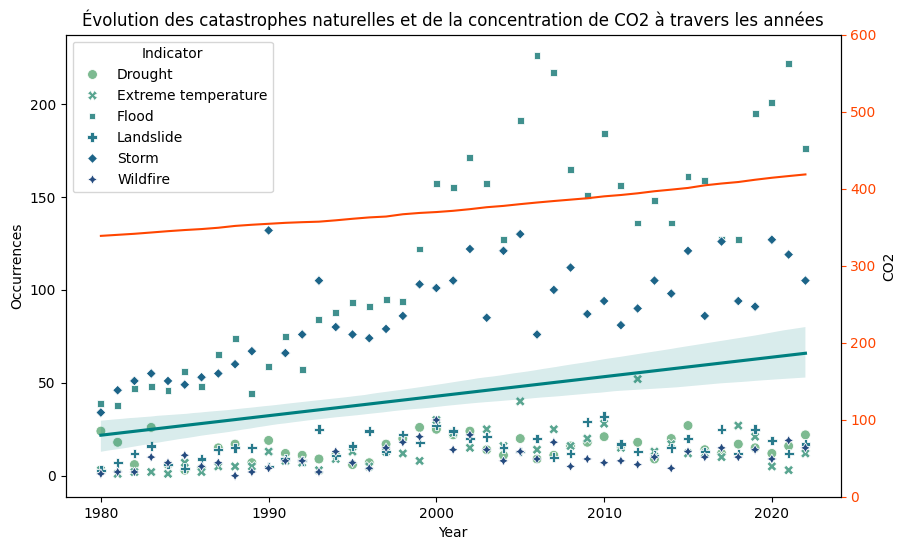

In [138]:
print(df_disasters_world)
# Convert 'Year' and 'Scale' to numeric types
df_disasters_world['Year'] = pd.to_numeric(df_disasters_world['Year'])
df_disasters_world['Occurrences'] = pd.to_numeric(df_disasters_world['Occurrences'])

# Creating a scatter plot with different colors for each indicator
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_disasters_world,
    x="Year",
    y="Occurrences",
    hue="Indicator",  # Use 'Indicator' column as hue
    style="Indicator",  # Use 'Indicator' column for marker style
    palette="crest",
    s=50, # Marker size
    
)

# Overlaying a single regression line for all points
sns.regplot(
    data=df_disasters_world,
    x="Year",
    y="Occurrences",
    scatter=False,  # Do not show individual points
    color='teal',  # Color of the regression line
)

# Creating a second y-axis for the CO2 emissions line plot
ax2 = plt.gca().twinx()  # Use plt.gca() to get the current axis

# Plotting the CO2 emissions on the second y-axis
sns.lineplot(data=df_emission[:-1], x="Year", y="Value", color='orangered', ax=ax2)

# Setting labels for each y-axis
plt.ylabel('Scale', color='black')
ax2.set_ylabel('CO2')

# Adjusting the y-axes to start from 0
ax2.set_ylim(0, 600)

# Changing the color of the numbers on the y-axis
ax2.tick_params(axis='y', colors='orangered')



plt.title('Évolution des catastrophes naturelles et de la concentration de CO2 à travers les années')
plt.show()

# Création d'un diagramme camembert

In [195]:
year = "2018"
iso3 = "FRA"
country = countries.loc[countries["ISO3"] == iso3, "Country"].values[0]
df_pie = df_disasters.loc[df_disasters["ISO3"] == iso3]
df_pie = df_pie.loc[df_pie["Year"] == year]

fig = go.Figure(data=[go.Pie(labels=df_pie["Indicator"], values=df_pie["Occurrences"], textinfo='label+percent')])
fig.update_layout(title_text=f"Répartition des catastrophes naturelles en {country} en {year}")
fig.show()

# Graphique global de l'évolution de la catastrophe

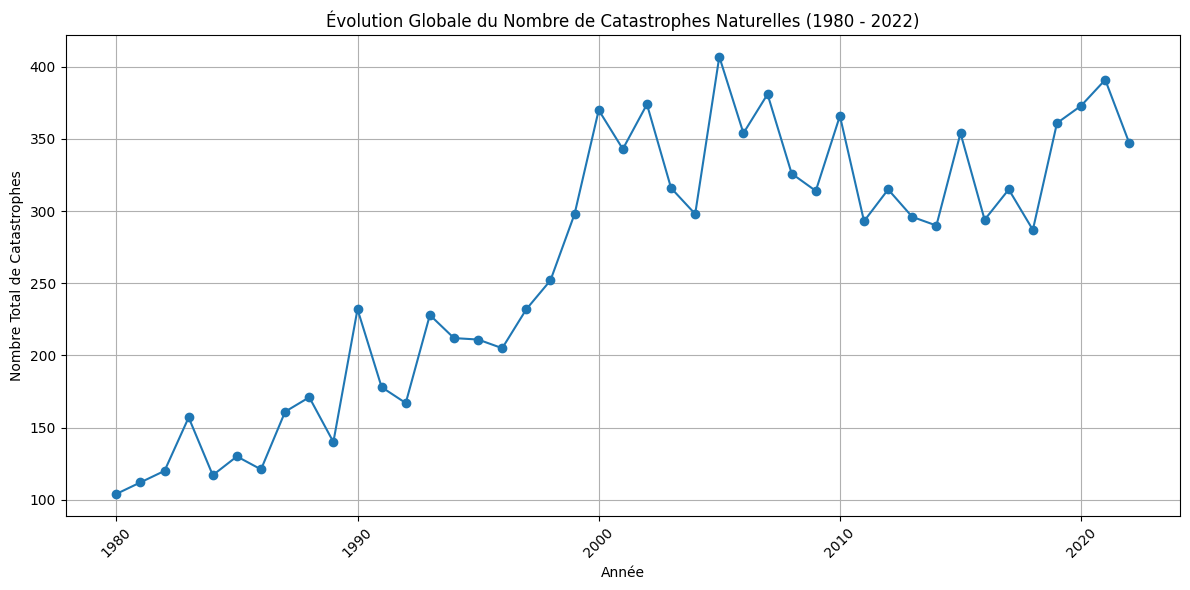

In [209]:
# Création du graphique en ligne pour l'évolution globale des catastrophes
plt.figure(figsize=(12, 6))
plt.plot(df_global_disasters['Year'], df_global_disasters['Occurrences'], marker='o', linestyle='-')
plt.title('Évolution Globale du Nombre de Catastrophes Naturelles (1980 - 2022)')
plt.xlabel('Année')
plt.ylabel('Nombre Total de Catastrophes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

# Diagramme en violon

    Indicator  Year  Occurrences
0     Drought  1980         24.0
1     Drought  1981         18.0
2     Drought  1982          6.0
3     Drought  1983         26.0
4     Drought  1984          6.0
..        ...   ...          ...
253  Wildfire  2018         10.0
254  Wildfire  2019         14.0
255  Wildfire  2020          9.0
256  Wildfire  2021         19.0
257  Wildfire  2022         15.0

[258 rows x 3 columns]


/var/folders/kw/gs_chyyn2bd3x3twksf8gdmr0000gn/T/ipykernel_84926/2111241968.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




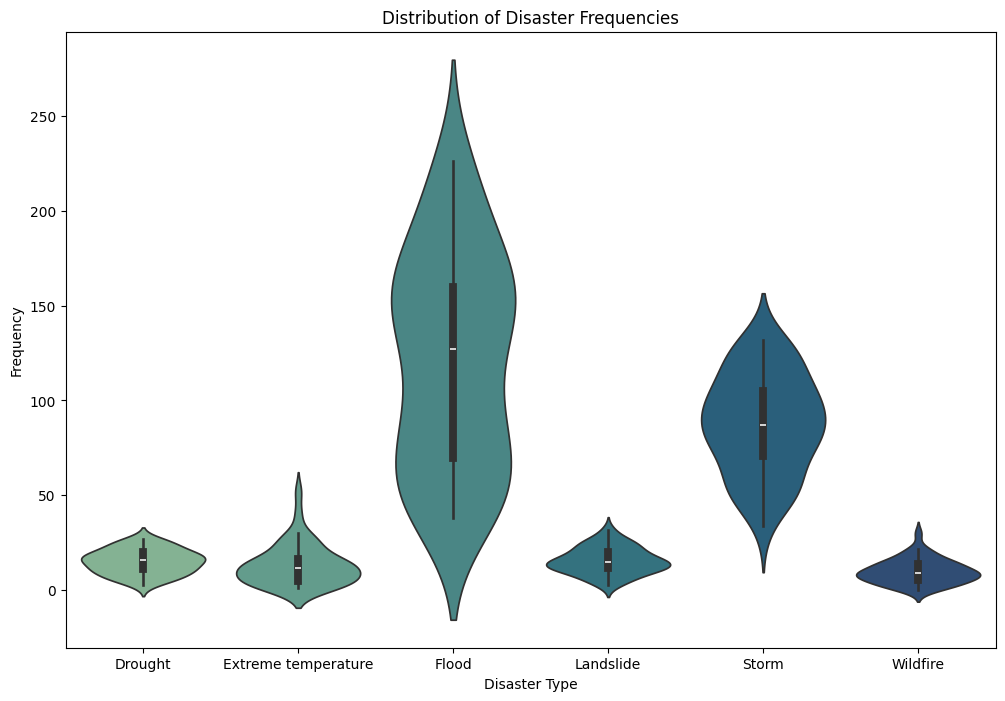

In [214]:
print(df_disasters_world)
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_disasters_world, x="Indicator", y="Occurrences", palette="crest")
plt.title('Distribution of Disaster Frequencies')
plt.xlabel('Disaster Type')
plt.ylabel('Frequency')
plt.show()


# Graphique en barres juxtaposées accumultées par année

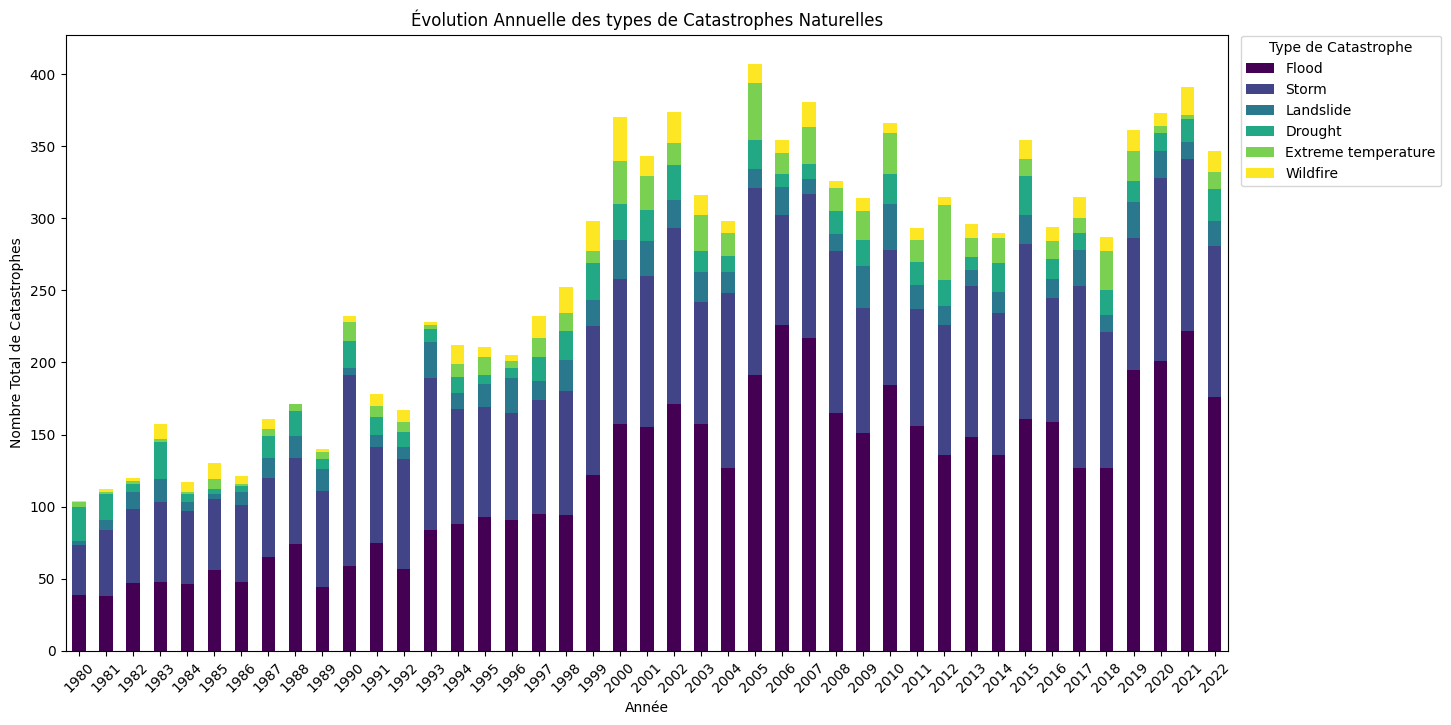

In [241]:
# Calculer le total des occurrences par type de catastrophe
total_per_type = df_disasters_world.groupby('Indicator')['Occurrences'].sum()

# Trier ces totals en ordre décroissant
sorted_types = total_per_type.sort_values(ascending=False).index

# Pivoter les données pour avoir les années en lignes et les types de catastrophes en colonnes
pivot_data = df_disasters_world.pivot(index='Year', columns='Indicator', values='Occurrences')

# Réordonner les colonnes selon l'ordre obtenu
pivot_data = pivot_data[sorted_types]

pivot_data.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title('Évolution Annuelle des types de Catastrophes Naturelles')
plt.xlabel('Année')
plt.ylabel('Nombre Total de Catastrophes')
plt.xticks(rotation=45)
plt.legend(title='Type de Catastrophe', bbox_to_anchor=(1.005, 1.01), loc='upper left')
plt.show()


# Cas particulier: évolution 